In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#check null values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<Axes: xlabel='DEATH_EVENT'>

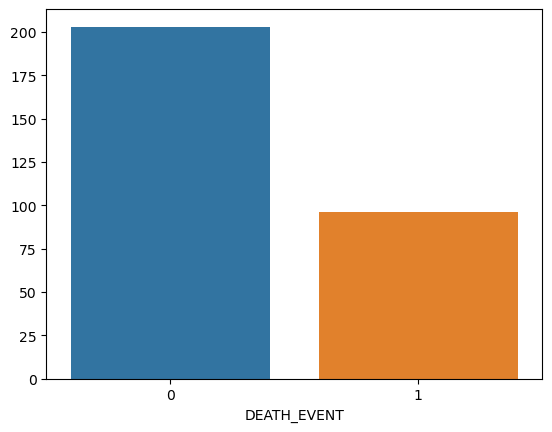

In [4]:
#check class imbalance
counts = df['DEATH_EVENT'].value_counts()
sns.barplot(x = counts.index,y=counts.values)

<Axes: >

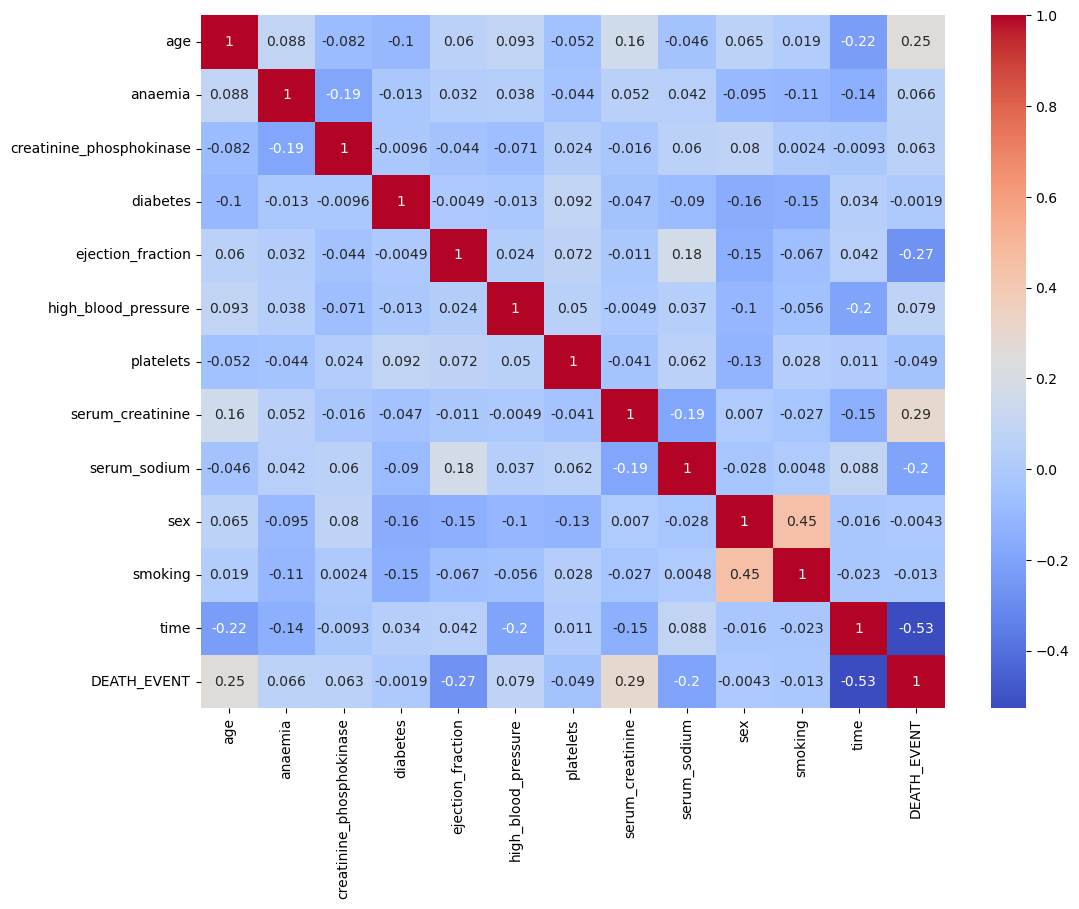

In [6]:
#plotting correlation
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [42]:
#split the data into dependent and independent
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [43]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [44]:
#split the data into training and testing set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [21]:
#import the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores = []
k_Values = []
for i in range(1,50,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    scores.append(accuracy_score(preds,y_test))
    k_Values.append(i)
print(scores)
print(k_Values)
    


[0.7833333333333333, 0.8, 0.75, 0.7333333333333333, 0.8166666666666667, 0.8, 0.8166666666666667, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8, 0.8, 0.8, 0.8, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [22]:
scores = np.array(scores)
max_indx = np.argmax(scores)
max_indx

7

In [29]:
print(scores[7])
print(k_Values[7])


0.8333333333333334
15


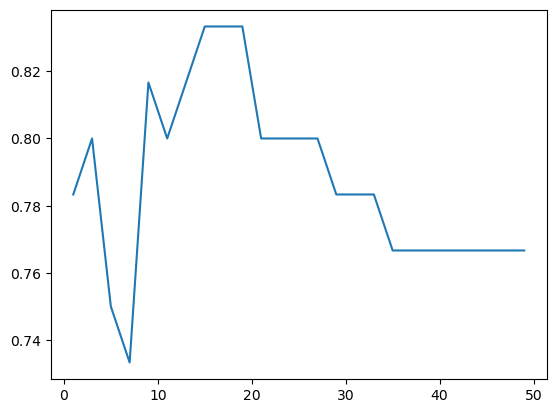

In [24]:
plt.plot(k_Values,scores)

# accuracy is highest when k = 15

In [31]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
final_model = KNeighborsClassifier(n_neighbors=15)
final_model.fit(x_train,y_train)
preds = final_model.predict(x_test)
print(classification_report(preds,y_test))
print(accuracy_score(preds,y_test))
print(confusion_matrix(preds,y_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        52
           1       0.43      0.75      0.55         8

    accuracy                           0.83        60
   macro avg       0.69      0.80      0.72        60
weighted avg       0.89      0.83      0.85        60

0.8333333333333334
[[44  8]
 [ 2  6]]


<Axes: >

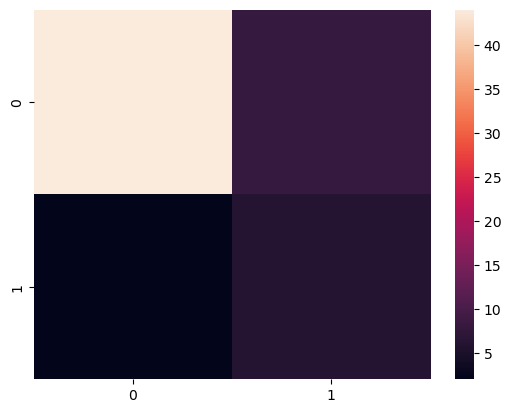

In [32]:
sns.heatmap(confusion_matrix(preds,y_test))

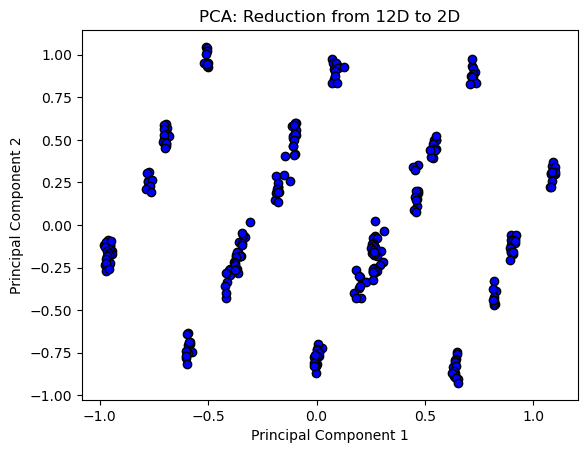

In [35]:
from sklearn.decomposition import PCA
#Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

#Plot the 2D PCA result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k')
plt.title('PCA: Reduction from 12D to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [37]:
X_pca

array([[-1.84974918e-01,  2.87692374e-01],
       [-3.73112071e-01, -1.75179740e-01],
       [-9.64366475e-01, -8.69459715e-02],
       [-9.98509647e-02,  5.43035991e-01],
       [ 9.00034926e-01, -5.76154554e-02],
       [-5.11502053e-01,  1.04607319e+00],
       [-1.11829065e-01,  5.81289964e-01],
       [-3.06545554e-01,  1.63979253e-02],
       [ 2.95713417e-01, -1.52210517e-01],
       [-5.07449222e-01,  1.03942363e+00],
       [-5.05336516e-01,  1.01983744e+00],
       [-7.74823099e-01,  3.08887878e-01],
       [-9.68085037e-02,  5.29774168e-01],
       [ 9.57237784e-02,  9.38336136e-01],
       [ 7.30502415e-01,  8.97135365e-01],
       [-9.58163792e-02,  5.97211254e-01],
       [-9.94364410e-02,  6.01383798e-01],
       [-3.67291117e-01, -1.68042100e-01],
       [ 7.17924281e-01,  9.34128650e-01],
       [ 9.18531512e-01, -7.96452617e-02],
       [ 7.20207608e-01,  9.23707496e-01],
       [ 1.08901161e+00,  3.46177352e-01],
       [-5.07956750e-01,  1.00246069e+00],
       [ 2.

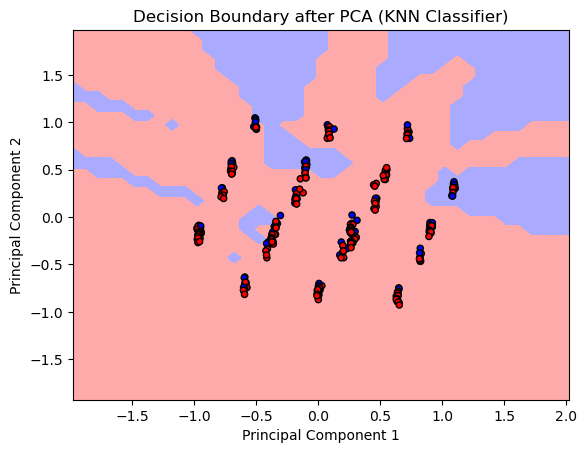

In [39]:
from matplotlib.colors import ListedColormap
# Train a KNN model on the PCA-transformed 2D data
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_pca, y)

# Step 5: Create a mesh grid for plotting decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light)

# Overlay the original PCA-transformed data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

# Labels and Title
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundary after PCA (KNN Classifier)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

euclidean accuracy: 0.8333333333333334
manhattan accuracy: 0.85
chebyshev accuracy: 0.7333333333333333
minkowski accuracy: 0.8333333333333334


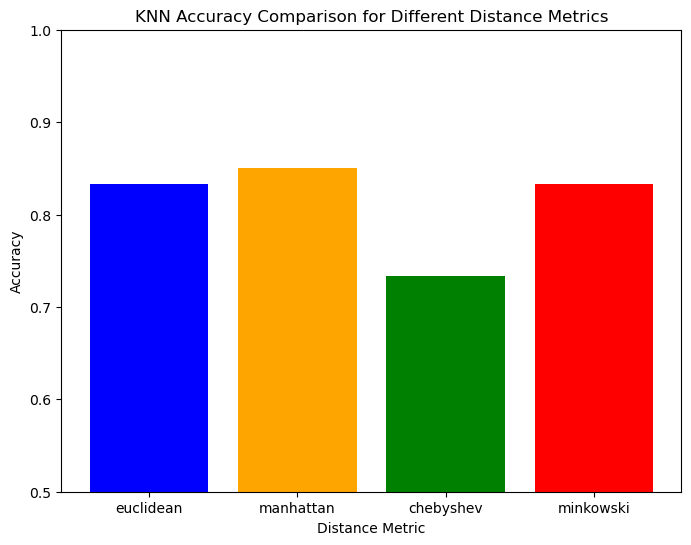

In [46]:
# Define different distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Initialize an empty list to store accuracies
accuracies = []

# Train KNN models using different distance metrics and compute accuracy
for metric in metrics:
    model_2 = KNeighborsClassifier(n_neighbors=15, metric=metric)
    model_2.fit(x_train, y_train)
    y_pred = model_2.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{metric} accuracy: {accuracy}")

# Plot a bar chart comparing the accuracies
plt.figure(figsize=(8, 6))
plt.bar(metrics, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Comparison for Different Distance Metrics')
plt.ylim(0.5, 1)  # Setting y-axis limit for better comparison
plt.show()